# Linear Regression

* Linear regression is a linear model.
* A model that assumes a linear relationship between the input variable (x) and the single output variable (y).
* (y) can be calculated from a linear combination of the input variable (x).
* When there is a single input variable (x), the method is referred to as **simple linear regression**.
* When there are multiple input variable, its often refers to as **multiple linear regression**.
* Input (x) and output (y) are numeric.

In Math, the linear regression line has an equation of the form:

```
y = xw + b
```

where,

* x is the explanatory variable
* y is the dependent variable
* w is the slope of the line
* b is the intercept (the value of y when x = 0)

In [32]:
# Import the relevant libraries
import numpy as np
import matplotlib.pyplot as plt # Optional, not required for model algorithm

## Generate random input data to train on

1. Draw samples from a [uniform distribution](http://mathworld.wolfram.com/UniformDistribution.html) using [Numpy's Random Uniform method](https://het.as.utexas.edu/HET/Software/Numpy/reference/generated/numpy.random.uniform.html).

2. In uniform distribution, `size = number of observations (n) * number of variables (k)`

```
input = n * k = 1000 * 1 [here k=1, as we are consider only 1 input (x)]
```

We have create a input data like `1000 * 1` matrix, which means `1` variables problem with `1000` observations.

In [33]:
observations = 1000

"""
1. Here, we are creating 2 input variables (x) and (z) problem with 1000 observations.
"""
x = np.random.uniform(low=-10, high=10, size=(observations, 1))
z = np.random.uniform(low=-10, high=10, size=(observations, 1))

* In our example we have 2 input variables and 1000 observations, thus we need `1000 * 2` matrix.
* We will combine samples (x) and (z) into `1` martix, by using `column_stack` function which takes a sequence of 1D-array and stacks them into a single 2D-array, which results into a matrix of `1000 * 2`.

Notes:

* Dimension are important in linear algebram as we can only multiple matrix that are compatible.
* We want to make sure we can multiple (x) times (w), since our linear model relies on that.
* We have created an input data `1000 * 2`, means `2` variables problems with `1000` observations.

In [34]:
inputs = np.column_stack((x, z))

# Lets know the shape of the input to verify the results
print(inputs.shape)

(1000, 2)


## Create the targets we will aim at

In supervized learning, below are the elements of the model:

1. Inputs
2. Weights
3. Biases
4. Outputs
5. Targets

**Notes**

* 2 major parameters are `inputs` and `targets`.
* We also need to generate targets.
* Weights, Biases and Outputs varies based on the algorithms.

Consider a targets = `f(x, z) = 2*x - 3*z + 5 + noise`. (*Completely arbitrarily chosen, We can try different functions as well.*)

Conceptually, the algorithm must learn this is the function and the Weights are `2` and `-3`
and the Bias is `5`.

We are introducing noice will make data bit random. Real data always contents noise.

In [35]:
noise = np.random.uniform(low=-1, high=1, size=(observations, 1))

targets = 2*x - 3*z + 5 + noise
# targets = 13*x - 7*z - 12 + noise # Try diff formula values

# Lets verify the shape of target after the x and z are applied
print(targets.shape)

(1000, 1)


## Initialize variables

* Lets review the linear model, `y = xw + b`.
* The model will try to find the value for `w` and `b` such that the output (y) are closer to the targets (t).

Steps:

1. Our initial weights and biases will be picked randomly from the interval `[-0.1, 0.1]` and we will generate them using uniform function as we did it before.

2. Set a learning rate. This is called `etas`. Different etas affect the speed of optimization.


In [36]:
init_range = 0.1

# As we have 2 input variables, we have 2 weights and we need to get the sample of size (2 * 1)
weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))
print(weights)

# Biases is a scale (1 * 1), if there are "n" outputs, there will "n" biases.
biases = np.random.uniform(low=-init_range, high=init_range, size=1)
print(biases)

# Set learning rate
learning_rate = 0.02 # etas

[[-0.03759142]
 [ 0.0336922 ]]
[-0.05975424]


## Train the model

Since this is an iterative problem, we need an iteration which has below steps:

1. Calculate outputs
2. Campare outputs to targets through the loss function (L2-norm loss function)
3. Adjust weights and biases
4. Repeat steps from (1) to (3) util we get the better match

**References**

* [Different between L1-norm vs L2-norm loss function](http://www.chioka.in/differences-between-l1-and-l2-as-loss-function-and-regularization/).
* [On Keggle L1-norm vs L2-norm loss functions](https://www.kaggle.com/residentmario/l1-norms-versus-l2-norms)


In [37]:
# Follow the Linear model equation (Y = xw + b)

for i in range (100):
    
    """
    Calculates the outputs by given weights and biases
    """
    outputs = np.dot(inputs, weights) + biases
    
    """
    Record the difference between outputs and targets
    """
    deltas = outputs - targets
    
    """
    Calculate the loss function that compares the outputs to the targets
    Use L2-norm loss/2 function to calculate the loss.
    Below will give Loss/Obseraction = Mean (average) loss
    """
    loss = np.sum(deltas ** 2) / 2 / observations
    
    """
    Print the loss for analysis to see at each step, whether the loss is decreasing
    """
    print(loss)
    
    deltas_scaled = deltas / observations
    
    """
    Updates the weights and biases by following the Gradient descent methodology
    """
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled) 

217.48043773578937
39.83416309188944
15.89605111940113
12.244817835902243
11.350601483865576
10.851778384099234
10.42302825500306
10.018297266405163
9.630510805744201
9.258126108944456
8.900411174060658
8.556770685056035
8.226648347303888
7.909512014497566
7.604850803087149
7.312173974141362
7.0310100998325
6.760906297798266
6.501427500745809
6.252155755536424
6.01268954995159
5.7826431659578885
5.5616460584147465
5.3493422582221175
5.1453897989464545
4.949460166001361
4.761237767495666
4.580419425896653
4.406713889689551
4.23984136424681
4.079533061151396
3.925530765248295
3.777586418726767
3.635461721563463
3.4989277476828056
3.3677645762163806
3.241760937267382
3.1207138716095195
3.00442840377228
2.892717227985944
2.785400406480503
2.6823050796525214
2.583265187633079
2.4881212028083426
2.396719872861896
2.3089139739249473
2.2245620734368146
2.143528302333702
2.065682136198826
1.9908981850213885
1.919055991225752
1.8500398356454728
1.7837385511297086
1.7200453434817218
1.65885761944

## Print weights and biases and see if we have worked correctly!

In [38]:
print(weights, biases)

[[ 1.99640501]
 [-2.98950591]] [4.32964086]


## Plot last outputs vs targets

Since they are the last ones at the end of the training, they represent the final model accuracy.
The closed this plot is to a 45 degree line, the closer target and output values are.

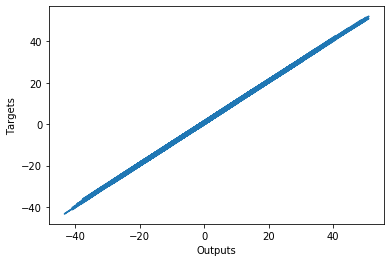

In [39]:
plt.plot(outputs, targets)
plt.xlabel("Outputs")
plt.ylabel("Targets")
plt.show()